# Homework 1

### Instructions:

1.- Answer all the questions on this Python notebook while mantaining its structure.

2.- All answers must be clearly shown.

3.- An additional PDF document is available on Brightspace which includes the tables necessary to complete the assignment

-----------

### Use this cell to import all the modules you need to complete this assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

-----

### A) Given the <u> apparent magnitudes </u> of the 5 main sequence stars shown in Table 1, calculate:

#### i) the temperature of each star using the following equation:

$$ T=4600K \bigg (\dfrac{1}{0.92(B-V)+1.7}+\dfrac{1}{0.92(B-V)+0.62} \bigg ) $$

In [2]:
m_V=[11.389,10.894,9.459,14.401,11.635]
m_B=[11.877,12.303,9.656,15.248,12.744]
m_r=[11.310,10.401,9.477,14.131,11.229]
m_i=[11.175,9.705,9.611,13.822,10.837]
bv=[]
temps=[]
for v,b in zip(m_V,m_B):
    b_v=b-v
    temp=4600*((1/(0.92*b_v+1.7))+(1/(0.92*b_v+0.62)))
    bv.append(b_v)
    temps.append(temp)
print(bv)#In mags
print(temps)#In Kelvin

[0.4880000000000013, 1.4090000000000007, 0.19700000000000095, 0.8469999999999995, 1.109]
[6443.818339152455, 3935.7212988566957, 8186.297014966463, 5142.906230227264, 4495.401645720815]


#### ii) their absolute magnitude using the information provided in Table 2 

(hint: as an approximation you can interpolate between two adjacent values)

In [8]:
ref_colours=[-0.35,-0.3,-0.31,-0.28,-0.25,-0.22,-0.19,-0.16,-0.13,-0.1,-0.06,-0.03,0,0.03,0.05,0.08,0.13,0.27,0.42,0.58,0.7,0.89,1.18,1.45,1.63,1.8]
ref_mags=[-5.8,-4,-4.1,-3.5,-2.9,-2.3,-1.7,-1.1,-0.7,-0.4,0,0.3,0.7,1,1.2,1.5,2,2.6,3.4,4.4,5.1,5.9,7.3,9,11.8,16]
est_mags=np.interp(bv,ref_colours,ref_mags)
for num,val in enumerate(est_mags):
    print(f'Star {num+1}: B-V={bv[num]}, M_v={val}')

Star 1: B-V=0.4880000000000013, M_v=3.8250000000000086
Star 2: B-V=1.4090000000000007, M_v=8.741851851851857
Star 3: B-V=0.19700000000000095, M_v=2.2871428571428614
Star 4: B-V=0.8469999999999995, M_v=5.718947368421051
Star 5: B-V=1.109, M_v=6.957241379310345


#### iii) an estimate of their spectral type

In [4]:
#Using values from above
#Star 1 is between F5 and and G0, So F7?
#Star 2 is between K5 and M0, is a K9 or M0?
#Star 3 is between A0 and A1 but slightly closer to A1
#Star 4 is between G5 and K0, so around G8?
#Star 5 is between K0 and K5, around K3

#### iv) the luminosity of each star using the following equation 
$$L=L_{\odot}10^{\dfrac{M_{\odot}-M_{\rm star}}{2.5}}$$
<strong>Note:</strong> M⊙ = 4.85. Give result in units of solar luminosity

In [9]:
Lums=[10**((4.85-el)/2.5) for el in est_mags]
for num,val in enumerate(Lums):
    print(f'Star {num+1}, L={val}L_☉')

Star 1, L=2.5703957827688426L_☉
Star 2, L=0.027749761781246017L_☉
Star 3, L=10.596022141812972L_☉
Star 4, L=0.4491806638245104L_☉
Star 5, L=0.14358314054500024L_☉


#### v) their radius
<strong>Note:</strong> Give result in units of solar radius

In [10]:
#L=4*pi*sigma*T^4*R^2
#R=sqrt(L/(4*pi*sigma*T^4))
#R/R_sol=(T_0/T)^2*sqrt(L/L_0)
#T_sol=5780K
rads=[]
for l,t in zip(Lums,temps):
    #print(l,t)
    rad=((5780/t)**2)*np.sqrt(l)
    rads.append(rad)
for num,val in enumerate(rads):
    print(f'Star {num+1}, R={val}R_☉')

Star 1, R=1.2899387814283503R_☉
Star 2, R=0.359282970178883R_☉
Star 3, R=1.6227518394976967R_☉
Star 4, R=0.8465429382012968R_☉
Star 5, R=0.6264269023085633R_☉


-------

### B) Based on the absolute magnitude obtained in section A.ii, calculate their distance using the following equation
$$m-M=5 \times log_{10}(d)-5 \textrm{ (where d is the distance in parsec)}$$
### and compare it to the parallax distance provided in Table 1 for each star.

In [11]:
dist=[]
for m,M in zip(m_V,est_mags):
    d=10**((m-M+5)/5)
    dist.append(d)
for num,val in enumerate(dist):
    print(f'Star {num+1}, d={val} pc')
#Very different

Star 1, d=325.6866822016685 pc
Star 2, d=26.941987458119357 pc
Star 3, d=271.8763486110726 pc
Star 4, d=545.0175991753491 pc
Star 5, d=86.20882466372609 pc


-------

### C) The main difference between the distance calculated in part B and that given in Table 2 was the absence of extinction correction on your calculations. 

### Consider that the extinction for the filter V can be calculated as 
$$A_{V} = 0.6 \times \big (\dfrac{d}{1000} \big ) \textrm{ (where d is the distance in parsec)}$$ 

<strong>Note:</strong> This approximation is valid for sources near the galactic plane. 
### Use this value and the parallax distance from Table 1 to calculate: 

#### i) the "real" absolute magnitude

In [17]:
dists=[1530,1930,3070,1600,1400]
ext_V=[0.6E-3*el for el in dists]
print(ext_V)
new_M_v=[]
for M,A in zip(est_mags,ext_V):
    new_M_v.append(M-A)
for num,val in enumerate(new_M_v):
    print(f'Star {num+1}, M_v={val}')


[0.9179999999999999, 1.158, 1.8419999999999999, 0.96, 0.84]
Star 1, M_v=2.907000000000009
Star 2, M_v=7.583851851851858
Star 3, M_v=0.4451428571428615
Star 4, M_v=4.758947368421051
Star 5, M_v=6.117241379310345


#### ii) their temperature

In [18]:
real_bv=np.interp(new_M_v,ref_mags,ref_colours)
real_temps=[4600*((1/(0.92*el+1.7))+(1/(0.92*el+0.62))) for el in real_bv]
print(real_bv)
for num,val in enumerate(real_temps):
    print(f'Star {num+1}, T={val} K')


[ 0.3275625   1.22508235 -0.01911429  0.64153383  0.935     ]
Star 1, T=7291.073086607025 K
Star 2, T=4260.094101334093 K
Star 3, T=10370.098959245055 K
Star 4, T=5809.538119049815 K
Star 5, T=4904.422780356989 K


#### iii) their luminosity

In [19]:
Real_Lums=[10**((4.85-el)/2.5) for el in new_M_v]
for num,val in enumerate(Real_Lums):
    print(f'Star {num+1}, L={val}L_☉')

Star 1, L=5.986872372480546L_☉
Star 2, L=0.08062305661059838L_☉
Star 3, L=57.80199886758124L_☉
Star 4, L=1.087479434351378L_☉
Star 5, L=0.3112457631423002L_☉


#### iv) their spectral type

In [ ]:
#Star 1 is F1 or f2
#Star 2 is K6
#Star 3 is B9
#Star 4 is G3
#Star 5 is K1

#### v) their radius

In [21]:
real_rads=[]
for l,t in zip(Real_Lums,real_temps):
    #print(l,t)
    rad=((5780/t)**2)*np.sqrt(l)
    real_rads.append(rad)
for num,val in enumerate(real_rads):
    print(f'Star {num+1}, R={val}R_☉')

Star 1, R=1.53770410408561R_☉
Star 2, R=0.5226932861819221R_☉
Star 3, R=2.3618988998360164R_☉
Star 4, R=1.0322454847119475R_☉
Star 5, R=0.7748749101066811R_☉


#### vi) How do these values compare to those obtained in section A?

-------

### D) Calculate the extinction curve ($A_{\lambda}$ vs λ, where λ is the centre wavelength of each filter) for each star

<strong>Note:</strong> Centre wavelenght for the filters mentioned on Table 1: V=547.7nm, B=435.3nm, r=620.4nm and i=769.8nm. 

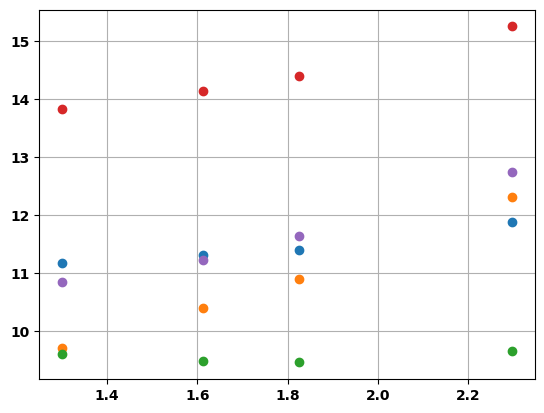

In [23]:
inv_wavs=[1/0.5477,1/0.4353,1/0.6204,1/0.7698]
for i in range(0,5):
    plt.scatter(inv_wavs,[m_V[i],m_B[i],m_r[i],m_i[i]])
plt.grid(True)

#### ii) If the values for all the stars are normalised, are the curves similar to each other? Why?